In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Simulation parameters
dt = 0.04  # time step
t_max = 10000  # maximum simulation time

In [24]:
# Arrays to store the time
t_values = np.arange(0, t_max, dt)

In [25]:
# Constants
G = 6.67430e-11  # gravitational constant
m = 1.0  # mass of orbiting body
M = 5.972e24  # mass of the central body (Earth)

In [26]:
# Initial parameters for elliptical orbit
r0  = np.array([10e6, 0])  # initial position
v0 = np.array([0, 2000])  # initial velocity

In [27]:
# Arrays to store trajectory
x_euler_values = np.zeros((len(t_values), 2))
v_euler_values = np.zeros((len(t_values), 2))
E_euler_values = np.zeros((len(t_values), 2))

In [28]:
# Setting the conditions into arrays
x_euler_values[0,:] = r0
v_euler_values[0,:] = v0

In [29]:
def a(x):
    r = np.linalg.norm(x)
    return -G * M / r**3 * x

In [30]:
# Euler Numerical integration loop
for i in range(0,len(t_values)-1):
    v_euler_values[i+1,:] = v_euler_values[i,:]+a(x_euler_values[i,:])*dt
    x_euler_values[i+1,:] = x_euler_values[i,:]+v_euler_values[i,:]*dt

for i in range(0,len(t_values)):
    E_euler_values[i]= m*(0.5*(np.linalg.norm(v_euler_values[i,:]))**2 - G*M/(np.linalg.norm(x_euler_values[i,:])))

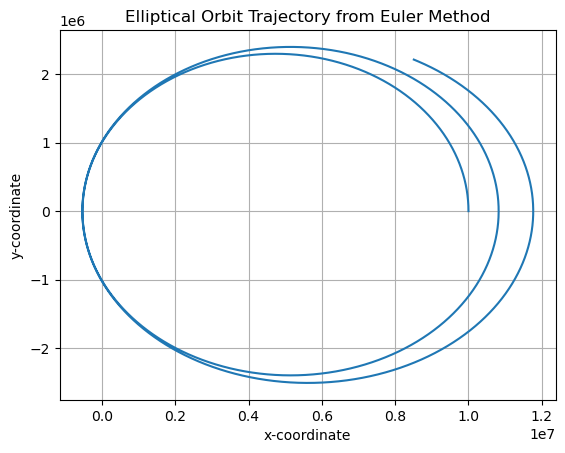

In [31]:
# Plotting the trajectory
plt.plot(x_euler_values[:, 0], x_euler_values[:, 1])
plt.title("Elliptical Orbit Trajectory from Euler Method")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True)
plt.show()

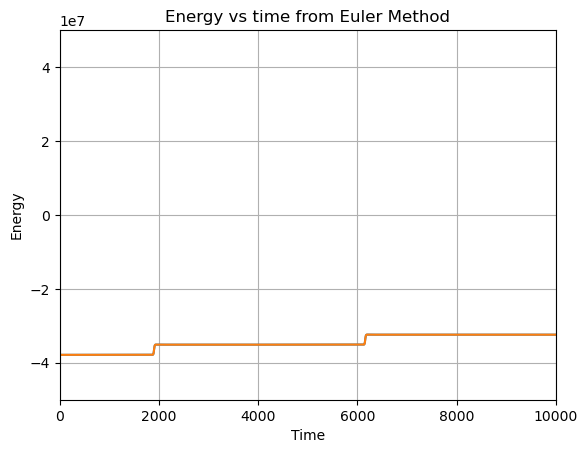

In [42]:
# Plotting the energy
plt.plot(t_values, E_elliptical_values[:])
plt.title("Energy vs time from Euler Method")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.grid(True)
plt.xlim(0, 10000)
plt.ylim(-5e7,5e7)
plt.show()

In [33]:
# Arrays to store trajectory
x_richardson_values = np.zeros((len(t_values), 2))
v_richardson_values = np.zeros((len(t_values), 2))
E_richardson_values = np.zeros((len(t_values), 2))

In [34]:
# Setting the conditions into arrays
x_richardson_values[0,:] = r0
v_richardson_values[0,:] = v0

In [35]:
# Euler Richardson Numerical integration loop
for i in range(0,len(t_values)-1):
    v_mid = v_richardson_values[i,:]+0.5*a(x_richardson_values[i,:])*dt
    x_mid = x_richardson_values[i,:]+0.5*v_richardson_values[i,:]*dt
    v_richardson_values[i+1,:] = v_richardson_values[i,:]+a(x_mid)*dt
    x_richardson_values[i+1,:] = x_richardson_values[i,:]+v_mid*dt

for i in range(0,len(t_values)):
    E_richardson_values[i]= m*(0.5*(np.linalg.norm(v_richardson_values[i,:]))**2 - G*M/(np.linalg.norm(x_richardson_values[i,:])))

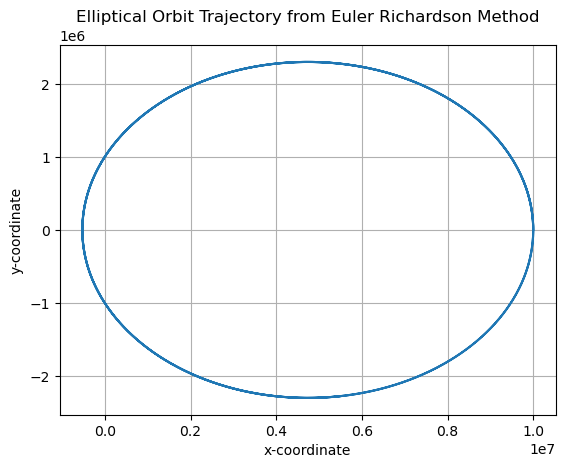

In [36]:
# Plotting the trajectory
plt.plot(x_richardson_values[:, 0], x_richardson_values[:, 1])
plt.title("Elliptical Orbit Trajectory from Euler Richardson Method")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True)
plt.show()

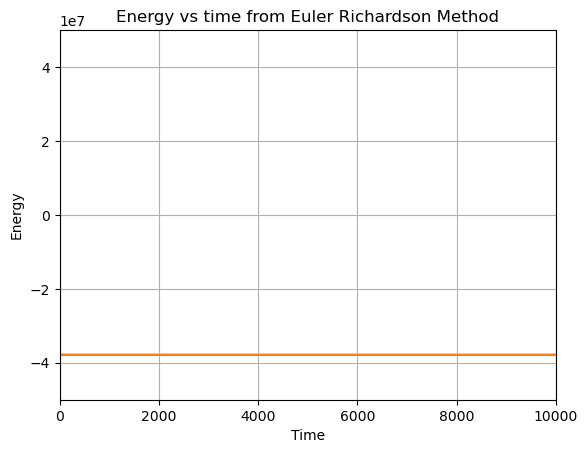

In [43]:
# Plotting the energy
plt.plot(t_values, E_richardson_values[:])
plt.title("Energy vs time from Euler Richardson Method")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.grid(True)
plt.xlim(0, 10000)
plt.ylim(-5e7,5e7)
plt.show()

As we can observe from the orbit plots, the euler method starts deviating from the elliptical shape predicted very quickly, while euler richardson sticks to the predicted shape till the end. Also, the energy plots show that energy calculated from euler method varies with time, whereas euler richarson shows energy to be constant wrt time.